# Microdados da Educação Superior

In [9]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np

p = 0.01

df = pd.read_csv(
    'SUP_ALUNO_2019.csv',
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep="|"
)

df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2019,1,1,1,1,NaN,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2016
1,2019,1,1,1,2,NaN,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2013
2,2019,1,1,1,2,NaN,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2015
3,2019,1,1,1,2,NaN,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2016
4,2019,1,1,1,2,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018


## Porcentagem de pessoas com deficiência no ensino superior

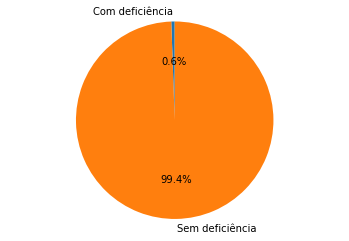

In [10]:
disabled = df.loc[df['IN_DEFICIENCIA'] == 1].count()[0]
nondisabled = df.loc[df['IN_DEFICIENCIA'] == 0].count()[0]
none = df.loc[df['IN_DEFICIENCIA'] == 9].count()[0]

labels = ['Com deficiência', 'Sem deficiência']
values = [disabled, nondisabled]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

#### Vei, existe uma Lei que diz que precisa ter 5% de pessoas com deficiência na universidade. Olha a diferença, FODA.

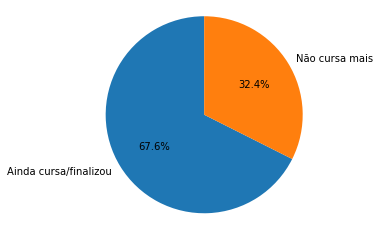

In [30]:
stds = df.loc[df['IN_DEFICIENCIA'] == 1]

cursando = stds.loc[stds['TP_SITUACAO'] == 2].count()[0]
trancado = stds.loc[stds['TP_SITUACAO'] == 3].count()[0]
desvinculado = stds.loc[stds['TP_SITUACAO'] == 4].count()[0]
transferido = stds.loc[stds['TP_SITUACAO'] == 5].count()[0]
formado = stds.loc[stds['TP_SITUACAO'] == 6].count()[0]
falecido = stds.loc[stds['TP_SITUACAO'] == 7].count()[0]

still = cursando + transferido
not_there = trancado + desvinculado + formado + falecido

labels = ['Ainda cursa/finalizou', 'Não cursa mais']
values = [still, not_there]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

### Desses 0.6%, 32.4% ainda desiste de alguma forma.

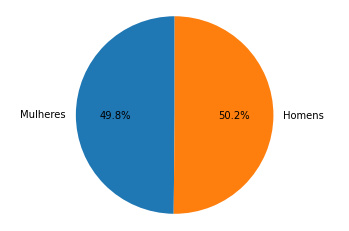

In [34]:
woman = stds.loc[stds['TP_SEXO'] == 1].count()[0]
men = stds.loc[stds['TP_SEXO'] == 2].count()[0]


labels = ['Mulheres', 'Homens']
values = [woman, men]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

### isso daqui não diz mta coisa. mas quando se compara com o geral...

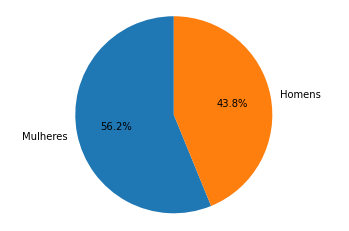

In [35]:
womens = df.loc[df['TP_SEXO'] == 1].count()[0] # Localizando as mulheres no dataframe na coluna TP_SEXO, [0] serve para retornar o valor da tabela
men = df.loc[df['TP_SEXO'] == 2].count()[0]

labels = ['Mulheres', 'Homens']
values = [womens, men]

fig1, ax1 = plt.subplots() # Retorna uma tupla(Figure, Axes)

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90) # Formatação do gráfico

ax1.axis('equal') # Deixar a forma redondinha
plt.show()

### Por que mulheres com deficiência tem menos presença nas universidades? Quando na verdade, na amostra geral, mulheres são maioria. Não é uma diferença pequena, são mais de 6.4%!!!

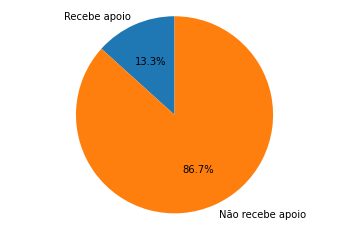

In [36]:
stds = df.loc[df['IN_DEFICIENCIA'] == 1]

not_recieve = stds.loc[stds['IN_APOIO_SOCIAL'] == 0].count()[0]
recieving = stds.loc[stds['IN_APOIO_SOCIAL'] == 1].count()[0]

labels = ['Recebe apoio', 'Não recebe apoio']
values = [recieving, not_recieve]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

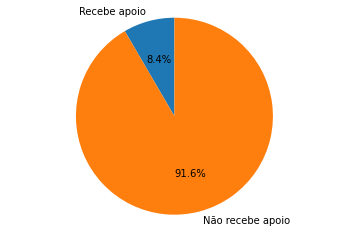

In [37]:
not_recieve = df.loc[df['IN_APOIO_SOCIAL'] == 0].count()[0]
recieving = df.loc[df['IN_APOIO_SOCIAL'] == 1].count()[0]

labels = ['Recebe apoio', 'Não recebe apoio']
values = [recieving, not_recieve]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

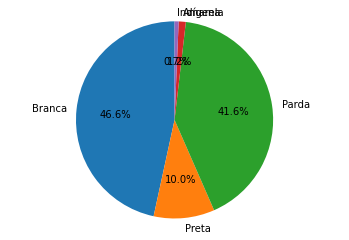

In [60]:
stds = df.loc[df['IN_DEFICIENCIA'] == 1]

B = stds.loc[stds['TP_COR_RACA'] == 1].count()[0]
P = stds.loc[stds['TP_COR_RACA'] == 2].count()[0]
Pa = stds.loc[stds['TP_COR_RACA'] == 3].count()[0]
A = stds.loc[stds['TP_COR_RACA'] == 4].count()[0]
In = stds.loc[stds['TP_COR_RACA'] == 5].count()[0]


labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
values = [B, P, Pa, A, In]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

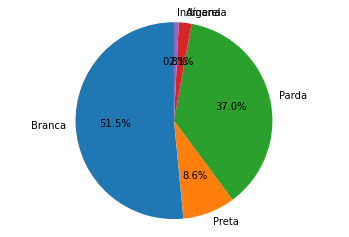

In [41]:
B = df.loc[df['TP_COR_RACA'] == 1].count()[0]
P = df.loc[df['TP_COR_RACA'] == 2].count()[0]
Pa = df.loc[df['TP_COR_RACA'] == 3].count()[0]
A = df.loc[df['TP_COR_RACA'] == 4].count()[0]
In = df.loc[df['TP_COR_RACA'] == 5].count()[0]

labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
values = [B, P, Pa, A, In]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()